In [11]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns and rename
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
stop_words = set(stopwords.words('english'))

In [18]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words
df['cleaned_message'] = df['message'].apply(clean_text)

In [19]:
df

,label,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b..."


In [20]:
ham_words = Counter()
spam_words = Counter()

for _, row in df.iterrows():
    if row['label'] == 'ham':
        ham_words.update(row['cleaned_message'])
    else:
        spam_words.update(row['cleaned_message'])

print("Most common words in Ham messages:")
print(ham_words.most_common(10))

print("\nMost common words in Spam messages:")
print(spam_words.most_common(10))

Most common words in Ham messages:
[('u', 988), ('im', 461), ('get', 307), ('ltgt', 276), ('ok', 272), ('dont', 268), ('go', 249), ('ur', 240), ('ill', 240), ('got', 232)]

Most common words in Spam messages:
[('call', 350), ('free', 219), ('u', 155), ('txt', 151), ('ur', 144), ('mobile', 124), ('text', 121), ('stop', 116), ('claim', 113), ('reply', 101)]


In [21]:
def get_ngrams(text, n):
    n_grams = nltk.ngrams(text, n)
    return [' '.join(grams) for grams in n_grams]

df['bigrams'] = df['cleaned_message'].apply(lambda x: get_ngrams(x, 2))
df['trigrams'] = df['cleaned_message'].apply(lambda x: get_ngrams(x, 3))

ham_bigrams = Counter()
spam_bigrams = Counter()
ham_trigrams = Counter()
spam_trigrams = Counter()

for _, row in df.iterrows():
    if row['label'] == 'ham':
        ham_bigrams.update(row['bigrams'])
        ham_trigrams.update(row['trigrams'])
    else:
        spam_bigrams.update(row['bigrams'])
        spam_trigrams.update(row['trigrams'])

print("Most common bi-grams in Ham messages:")
print(ham_bigrams.most_common(10))

print("\nMost common bi-grams in Spam messages:")
print(spam_bigrams.most_common(10))

print("\nMost common tri-grams in Ham messages:")
print(ham_trigrams.most_common(10))

print("\nMost common tri-grams in Spam messages:")
print(spam_trigrams.most_common(10))

Most common bi-grams in Ham messages:
[('call later', 50), ('ill call', 48), ('let know', 39), ('sorry ill', 39), ('r u', 37), ('u r', 37), ('dont know', 33), ('good morning', 30), ('im going', 26), ('take care', 24)]

Most common bi-grams in Spam messages:
[('please call', 46), ('po box', 28), ('p per', 25), ('contact u', 24), ('guaranteed call', 23), ('call landline', 23), ('prize guaranteed', 22), ('selected receive', 19), ('send stop', 19), ('every week', 19)]

Most common tri-grams in Ham messages:
[('ill call later', 42), ('sorry ill call', 38), ('happy new year', 18), ('pls send message', 13), ('cant pick phone', 12), ('pick phone right', 12), ('phone right pls', 12), ('right pls send', 12), ('hi hi hi', 11), ('wat time u', 8)]

Most common tri-grams in Spam messages:
[('prize guaranteed call', 21), ('call land line', 18), ('private account statement', 16), ('call identifier code', 15), ('guaranteed call land', 15), ('call p per', 15), ('identifier code expires', 14), ('land lin

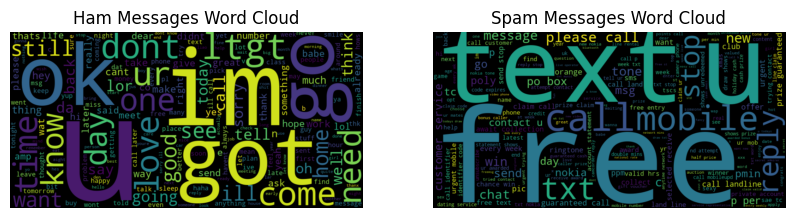

In [26]:
ham_wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(df[df['label'] == 'ham']['cleaned_message'].apply(lambda x: ' '.join(x))))
spam_wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(df[df['label'] == 'spam']['cleaned_message'].apply(lambda x: ' '.join(x))))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages Word Cloud')

plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['message'])

y = df['label'].map({'ham': 0, 'spam': 1}).values

from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)
print("F1-Score with Bag-of-Words:")
print(classification_report(y_test, y_pred))

F1-Score with Bag-of-Words:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to Tf-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

# Split the data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("F1-Score with Tf-IDF:")
print(classification_report(y_test, y_pred))

F1-Score with Tf-IDF:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [35]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['preprocessed_message'] = df['message'].apply(preprocess_text)

# Convert text to Tf-IDF vectors
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['preprocessed_message'])

# Split the data
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train, y_test = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf_preprocessed, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf_preprocessed)
print("F1-Score with Preprocessed Tf-IDF:")
print(classification_report(y_test, y_pred))


F1-Score with Preprocessed Tf-IDF:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.63      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



In [36]:
scores = {
    "Model": ["Bag-of-Words", "Tf-IDF", "Preprocessed Tf-IDF"],
    "F1-Score": [0.98, 0.96, 0.95]  # Example scores; replace with actual results from your runs
}

results = pd.DataFrame(scores)
print(results)


                 Model  F1-Score
0         Bag-of-Words      0.98
1               Tf-IDF      0.96
2  Preprocessed Tf-IDF      0.95
